# Machine Learning by SVM

**Reference**

[https://github.com/saiharshithreddy/Text-classification-and-summarization/blob/master/TextClassification/TextClassification_bbc_SVM.ipynb](https://github.com/saiharshithreddy/Text-classification-and-summarization/blob/master/TextClassification/TextClassification_bbc_SVM.ipynb)

**Importing required libraries.**

Importing libraries to load file

In [1]:
import pandas as pd

Importing libraries for text preprocessing

- NLTK

    Leading platform for building Python programs to work with human language data

In [2]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Importing libraries to make Vector

- Scikit-Learn

    Python module for machine learning

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

Importing libraries for Machine Learning Model (SVM)

In [4]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

A New Multi-Turn, Multi-Domain, Task-Oriented Dialogue Dataset

- [https://nlp.stanford.edu/blog/a-new-multi-turn-multi-domain-task-oriented-dialogue-dataset/](https://nlp.stanford.edu/blog/a-new-multi-turn-multi-domain-task-oriented-dialogue-dataset/)

    A corpus of 3,031 multi-turn dialogues in 3 distinct domains appropriate for an in-car assistant

    - calendar scheduling
    - weather information retrieval
    - point-of-interest navigation.

In [5]:
Corpus = pd.read_csv('intent_text.csv',delimiter=',',encoding='utf-8')
Corpus.head()

,category,text
0,weather,Will it be misty in Los Angeles today?
1,schedule,What time is my next swimming activity and who...
2,weather,what will the temperature be for the next week
3,navigate,Can you find me a shopping center?
4,schedule,when am i playing tennis


In [6]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  3030 non-null   object
 1   text      3030 non-null   object
dtypes: object(2)
memory usage: 47.5+ KB


Text(0.5, 1.0, 'CountPlot')

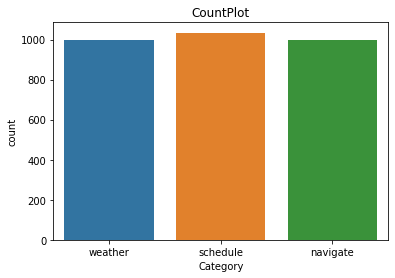

In [7]:
sns.countplot(Corpus.category)
plt.xlabel('Category')
plt.title('CountPlot')

## 1. Data Preprocessing

First of all, we need to preprocess the data in order to train the model.

(ex) Hello World! I majored in computer science.

- Lowercase
→ hello world! i majored in computer science.
- Tokenize
→ ['hello', 'world', '!', 'i', 'majored', 'in', 'computer', 'science', '.']
- Lemmatize
→ ['hello', 'world', '!', 'i', 'major', 'in', 'computer', 'science', '.']
- Stopword Filtering
→ ['hello', 'world', '!', 'major', 'computer', 'science', '.']

In [8]:
def preprocess_tokenizer(string):
    
    # 1. Make all charactors lower
    string = string.lower()
    
    # 2. Tokenize
    string = word_tokenize(string)
    
    # 3. Lemmatize
    lemmatizer = WordNetLemmatizer()    
    string = [lemmatizer.lemmatize(w, 'v') for w in string]
    
    # 4. Remove Stopwords.
    stop_words = set(stopwords.words('english'))
    stop_words.add('?')
    stop_words.add(',')
    stop_words.remove('who')
    stop_words.remove('when')
    stop_words.remove('where')
    
    result = []
    
    for w in string: 
        if w not in stop_words: 
            result.append(w)

    return result

In [9]:
for index,entry in enumerate(Corpus['text']):
    result = preprocess_tokenizer(entry)
    Corpus.loc[index,'text_final'] = str(result)

In [10]:
Corpus.drop(['text'], axis=1)
output_path = 'preprocessed_data.csv'
Corpus.to_csv(output_path, index=False)

Splitting the data into train and test datasets (Train : Test = 7 : 3)

In [11]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['category'],test_size=0.3)

Extract TF-IDF features from Dataset

- TF-IDF (Term Frequency-Inverse Document Frequency)

    Numerical statistic that is intended to reflect how important a word is in a collection or corpus.

Create vectors using TF-IDF feature

- The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.
- A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.

In [12]:
# Convert a collection of raw documents to a matrix of TF-IDF features.
Tfidf_vect = TfidfVectorizer(max_features=200)

# Learn vocabulary and idf from training set.
Tfidf_vect.fit(Corpus['text_final'])

# Transform documents to document-term matrix.
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# A mapping of terms to feature indices.
print(Tfidf_vect.vocabulary_)

{'misty': 112, 'los': 104, 'angeles': 22, 'today': 178, 'time': 177, 'next': 123, 'swim': 169, 'activity': 15, 'who': 195, 'attend': 26, 'temperature': 174, 'week': 190, 'find': 64, 'shop': 156, 'center': 35, 'when': 193, 'tennis': 175, 'rest': 144, 'stop': 164, 'humid': 93, 'please': 134, 'give': 79, 'address': 17, 'directions': 55, 'via': 185, 'route': 148, 'avoid': 29, 'heavy': 86, 'traffic': 181, 'grocery': 84, 'store': 165, 'need': 121, 'fastest': 62, 'hospital': 89, 'highest': 87, 'go': 80, 'cleveland': 41, 'forecast': 68, 'weather': 188, 'like': 99, 'tomorrow': 180, 'schedule': 151, 'dentist': 52, 'appointment': 23, 'pm': 135, 'month': 114, 'father': 63, 'weekly': 192, 'report': 143, 'city': 38, 'date': 49, 'agenda': 18, 'meet': 110, 'fresno': 70, 'right': 146, 'remind': 141, '12th': 3, 'conference': 46, 'room': 147, 'make': 105, 'reminder': 142, 'pick': 131, 'later': 98, 'frost': 74, 'durham': 59, 'gas': 77, 'station': 163, 'fast': 61, 'car': 34, 'desire': 53, 'one': 125, 'near

Print (Number of utterence(=sentence), Number of features)

In [13]:
Train_X_Tfidf.shape

(2121, 200)

Print (Index of utterence(=sentence), Index of feature)    TF-IDF of feature

In [14]:
print(Train_X_Tfidf)

  (0, 198)	0.3315301997284456
  (0, 154)	0.2803209510535776
  (0, 142)	0.28201096512034424
  (0, 135)	0.3220383798892404
  (0, 134)	0.27626026736903947
  (0, 45)	0.4184585477795623
  (0, 28)	0.43059792199941443
  (0, 13)	0.4375238582429908
  (1, 154)	0.39744893489872873
  (1, 142)	0.3998450964709398
  (1, 105)	0.6203367632632741
  (1, 57)	0.43318715359222315
  (1, 23)	0.33119395085466646
  (2, 133)	0.5046460508141107
  (2, 120)	0.39032506982466025
  (2, 79)	0.4241921494611789
  (2, 55)	0.3996368026368218
  (2, 44)	0.503319132934383
  (3, 71)	0.552066481899355
  (3, 65)	0.602560679545515
  (3, 30)	0.5763186853025992
  (4, 177)	0.4022403876695502
  (4, 110)	0.47053745381190054
  (4, 49)	0.46612244942002007
  (4, 18)	0.6320815115428898
  :	:
  (2115, 151)	0.5510758053767115
  (2115, 57)	0.6629053462487878
  (2115, 23)	0.5068253729275831
  (2116, 177)	0.4563245419249147
  (2116, 57)	0.5685177027800016
  (2116, 49)	0.5287960128639553
  (2116, 23)	0.43466114484958274
  (2117, 190)	0.28998114

# Train & Test

**Train & Test SVM Model**

1. Setting parameters for SVM

    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

    - C : Regularization parameter
    - **kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}**
                 Specifies the kernel type to be used in the algorithm
    - degree : Degree of the polynomial kernel function (‘poly’)
    - gamma : Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’


2. Train SVM

    SVM.fit(Train data, Train label)


3. Test(Predict)

    SVM.predict(Test data)  //return predicted label of Test data


4. Accuracy

    Accuracy classification score

    Let's see how well our model has trained.

In [15]:
# Classifier - Algorithm - SVM
# 1. Setting parameters for SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

# 2. Train SVM
SVM.fit(Train_X_Tfidf,Train_Y)

# 3. Predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# 4. Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  100.0


Build a text report showing the main classification metrics

In [16]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

    navigate       1.00      1.00      1.00       320
    schedule       1.00      1.00      1.00       297
     weather       1.00      1.00      1.00       292

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909



# AI, Is it work well?

Function to get intent of input string

In [17]:
def intent(str):
    uttr = Tfidf_vect.transform([str])
    intent = SVM.predict(uttr)
    print(intent)

Let's put some example to our SVM model

In [18]:
intent("Find the parking lot")

['navigate']


In [19]:
intent("When is the lab meeting?")

['schedule']


In [20]:
intent("is it sunny today?")

['weather']
